In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
#plt.switch_backend("Qt5Agg")
import copy
from scipy import ndimage, datasets

In [2]:
file_ek = 'GaSe0004_old_format_proj1.h5'

with h5py.File(file_ek, 'r') as fpath_ek:

    data_ek_1921 = np.asarray(fpath_ek['Slices/K_M_1921']) #
    data_ek_1941 = np.asarray(fpath_ek['Slices/K_M_1941']) # Im Zeitüberlapp
    data_ek_2051 = np.asarray(fpath_ek['Slices/K_M_2051']) # kurz vor dem Überlapp
    data_ek_2151 = np.asarray(fpath_ek['Slices/K_M_2151']) # weit vor dem Zeitüberlapp

print(np.shape(data_ek_1921))
print(np.size(data_ek_1941))
print(np.size(data_ek_2051))
print(np.size(data_ek_2151))

print(data_ek_2151[130])

(300, 100)
30000
30000
30000
[0.00000000e+00 4.49218750e-02 2.46679688e+00 1.50000000e+00
 2.03906250e+00 5.27148438e+00 4.46093750e+00 1.09882812e+01
 1.89121094e+01 3.79531250e+01 4.31816406e+01 3.42734375e+01
 4.64003906e+01 4.82695312e+01 6.58339844e+01 6.73242188e+01
 6.12109375e+01 6.87734375e+01 8.99902344e+01 1.11062500e+02
 9.25156250e+01 1.22585938e+02 1.28095703e+02 1.57244141e+02
 1.66173828e+02 1.63785156e+02 1.59761719e+02 1.63738281e+02
 1.63882812e+02 1.55322266e+02 1.74578125e+02 1.76316406e+02
 1.57269531e+02 1.46669922e+02 1.34148438e+02 1.21615234e+02
 1.13845703e+02 1.23460938e+02 1.42626953e+02 1.41050781e+02
 1.67197266e+02 1.86958984e+02 1.76312500e+02 1.57949219e+02
 1.54257812e+02 1.55058594e+02 1.45406250e+02 1.17984375e+02
 1.46070312e+02 1.46933594e+02 1.32869141e+02 1.31664062e+02
 1.56046875e+02 1.56457031e+02 1.31562500e+02 1.28050781e+02
 1.49201172e+02 1.46628906e+02 1.58976562e+02 1.69033203e+02
 1.59451172e+02 1.46046875e+02 1.55865234e+02 1.75398438

In [3]:
# def gradient(a):
#     j = copy.deepcopy(a)
#     x = np.shape(j)[0]
#     for i in range(x):
#         k = np.gradient(j[i])
#         j[i] = k
#     y = np.shape(j)[1]
#     for i in range(y):
#         k = np.zeros(x)
#         for l in range(x):
#             k[l] = j[l][i]
#         p = np.gradient(k)
#         for l in range(x):
#             j[l][i] = p[l]

#     return j

# gradient(gradient(data_ek_2151))


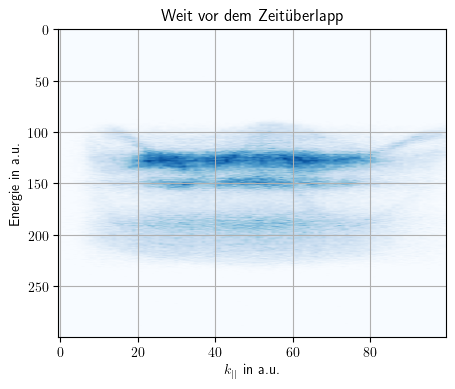

In [4]:
arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

#######################################################################################################################
# Plot structure 1 Ek
#######################################################################################################################
#plt.figure()
fig, ax = plt.subplots(figsize=(5,4))
ax.imshow(data_ek_2151, **arg_imshow, aspect="auto")
ax.grid()
ax.set_title("Weit vor dem Zeitüberlapp")
ax.set_xlabel(r"$k_{||}$ in a.u.")
ax.set_ylabel("Energie in a.u.")
plt.show()

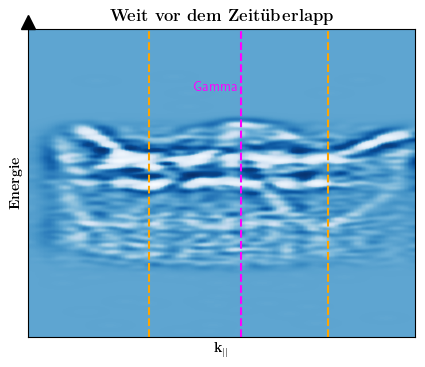

In [72]:
data_ek_2151_laplace = ndimage.gaussian_laplace(data_ek_2151,sigma = 2)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

#######################################################################################################################
# Plot structure 1 Ek
#######################################################################################################################
#plt.figure()
fig, ax = plt.subplots(figsize=(5,4))
what = ax.imshow(data_ek_2151_laplace, **arg_imshow, aspect="auto", norm="symlog", extent=[-2,2,0,1])
ax.grid()
ax.set_title(r"\bf{Weit vor dem Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$")
ax.set_ylabel(r"\bf{Energie}")

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])  

ax.plot((-2), (1.022), ls="", marker="^", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.plot((2), (0), ls="", marker=">", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
plt.vlines(0.2,0,1,color="magenta",linestyle="dashed")   #Gamma
plt.vlines(-0.75,0,1,color="orange",linestyle="dashed")   #M
plt.vlines(1.1,0,1,color="orange",linestyle="dashed")   #M

ax.text(-0.3,0.8,"Gamma",color="magenta")

#fig.colorbar(what)
plt.savefig('vorher.pdf', format='pdf', dpi=300)
plt.show()

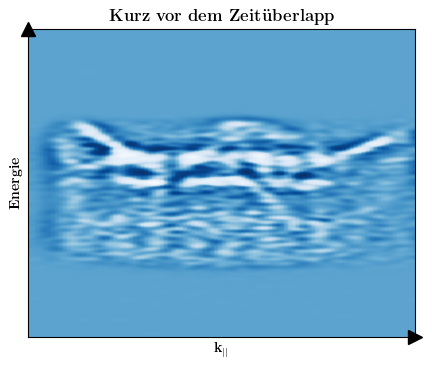

In [39]:
data_ek_2051_laplace = ndimage.gaussian_laplace(data_ek_2051,sigma = 2)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(5,4))

ax.imshow(data_ek_2051_laplace, **arg_imshow, aspect="auto",norm="symlog", extent=[-2,2,0,1])
ax.grid(linestyle="dashed")
ax.set_title(r"\bf{Kurz vor dem Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$")
ax.set_ylabel(r"\bf{Energie}")

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])  

ax.plot((-2), (1), ls="", marker="^", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((2), (0), ls="", marker=">", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

plt.savefig('kurzvorher.pdf', format='pdf', dpi=300)
plt.show()

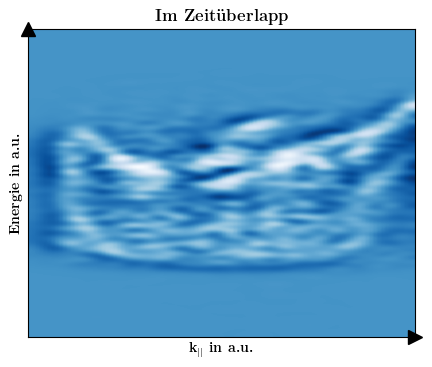

In [42]:
data_ek_1941_laplace = ndimage.gaussian_laplace(data_ek_1941,sigma = 3)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(5,4))
ax.imshow(data_ek_1941_laplace, **arg_imshow, aspect="auto",norm="symlog", extent=[-2,2,0,1])
ax.grid()
ax.set_title(r"\bf{Im Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$ \bf{in a.u.}")
ax.set_ylabel(r"\bf{Energie in a.u.}")

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])  

ax.plot((-2), (1), ls="", marker="^", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((2), (0), ls="", marker=">", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

plt.savefig('mittendrin.pdf', format='pdf', dpi=300)
plt.show()

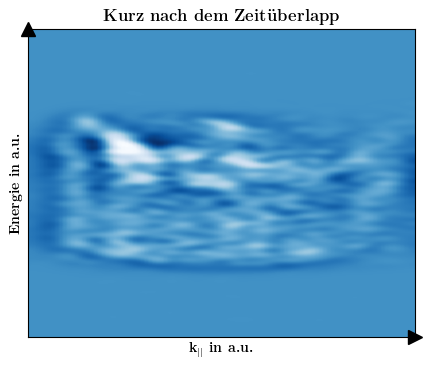

In [43]:
data_ek_1921_laplace = ndimage.gaussian_laplace(data_ek_1921,sigma = 3)

arg_imshow = dict(cmap='Blues')

plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(5,4))
ax.imshow(data_ek_1921_laplace, **arg_imshow, aspect="auto",norm="symlog",extent=[-2,2,0,1])
ax.grid()
ax.set_title(r"\bf{Kurz nach dem Zeitüberlapp}")
ax.set_xlabel(r"$\mathbf{k_{||}}$ \bf{in a.u.}")
ax.set_ylabel(r"\bf{Energie in a.u.}")

ax.set_xticks([])
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])  

ax.plot((-2), (1), ls="", marker="^", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((2), (0), ls="", marker=">", ms=10, color="k", transform=ax.get_xaxis_transform(), clip_on=False)

plt.savefig('kurznacher.pdf', format='pdf', dpi=300)
plt.show()

In [9]:
# save = False

# if save is True:
#     plt.savefig('ek_GaSe0004.pdf', format='pdf', transparent=True, dpi=300)

# plt.show()

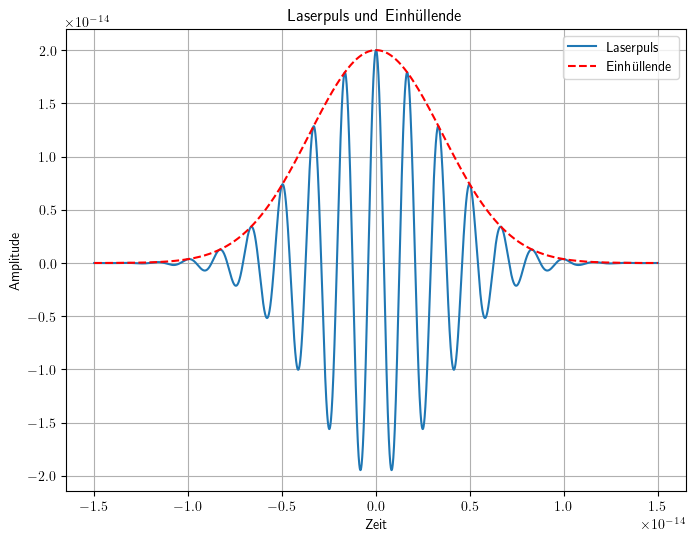

In [10]:
def envelope(t, A, tau, t0):
    return A * np.exp(-((t - t0) / tau)**2)

def laser_puls(t, A, T, tau, t0, frequency, phase):
    return  envelope(t, A, tau, t0) * np.cos(2 * np.pi * frequency * (t - t0) / T + phase)

# Zeitvektor
t = np.linspace(-1.5e-14, 1.5e-14, 5000)

# Parameter des Laserpulses
A = 2e-14         # Amplitude
T = 5e-15        # Dauer des Pulses
tau = 5e-15       # Breite des Pulses
t0 = 0        # Zeitversatz
frequency = 3 # Frequenz
phase = 0     # Phase

# Laserpuls und Einhüllende
env = envelope(t, A, tau, t0)
laser_pulse = laser_puls(t, A, T, tau, t0, frequency, phase)

#plt.switch_backend('Qt5Agg')
#plt.switch_backend('inline')
# Plot
plt.figure(figsize=(8, 6))
plt.plot(t, laser_pulse, label='Laserpuls')
plt.plot(t, env, 'r--', label='Einhüllende')
plt.xlabel('Zeit')
plt.ylabel('Amplitude')
plt.title('Laserpuls und Einhüllende')
plt.legend()
plt.grid(True)
plt.show()
